<a href="https://colab.research.google.com/github/ElijahLewisUWI/COMP3610-A3/blob/main/amazon_data_eda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [50]:
# Define the path to your file
file_path_1 = '/content/drive/MyDrive/amazon_data_2023/cleaned_amazon_data.csv'

# Load the dataset
df = pd.read_csv(file_path_1)
df.head()

<ipython-input-50-afbdf4450a66>:5: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path_1)


,rating,title_x,text,images_x,asin,parent_asin,user_id,timestamp,verified_purchase,helpful_vote,...,videos,store,categories,details,bought_together,subtitle,author,brand,review_length,year
0,5.0,Great quality foils,Not quite an exact match from the photo but I ...,[],B07WP8F672,B07WP8F672,AGEDWWZQJCZZCUVYK4SVFKLGTELQ,1595849524300,True,0,...,"{'title': [], 'url': [], 'user_id': []}",Comdoit,[],"{""Surface Recommendation Metal"": """", """": ""Shap...",NaN,NaN,NaN,Comdoit,18,NaN
1,5.0,Good quality,Good quality thread. Several needles.,[],B07ZYTSPXN,B07ZYTSPXN,AH5SV6MBM3YNNM3P5654A63GNCVA,1589808998247,True,0,...,"{'title': [], 'url': [], 'user_id': []}",AWEHIRU,[],"{""Brand"": ""Wiz Bir"", ""Included Components"": ""N...",NaN,NaN,NaN,AWEHIRU,5,NaN
2,2.0,Not too great,Lubricating strip is too oily at first and doe...,[],B007UM7NUG,B007UM7NUG,AHJZBV4OQJNPF2Z4OIUWU4VTJUDQ,1371053208000,False,3,...,"{'title': [], 'url': [], 'user_id': []}",Gillette,[],"{""Brand"": ""Gillette"", ""Unit Count"": ""1 Count"",...",NaN,NaN,NaN,Gillette,42,NaN
3,5.0,Polish that stays!,Amazing polish! Normally my polish chips the s...,[],B078924WCD,B078924WCD,AEOFMO5ZBZTG66EAGK5UEXTGWYDA,1609646481775,True,1,...,"{'title': [], 'url': [], 'user_id': []}","Starrily, Inc.",[],"{""Brand"": ""Starrily, Inc."", ""Item Form"": ""Liqu...",NaN,NaN,NaN,"Starrily, Inc.",21,NaN
4,5.0,Love them,Love them,[],B08N4RMG98,B08N4RMG98,AGXPTI6RJITQCKBZDTBIFHCRMZ4A,1623054534426,True,0,...,"{'title': [], 'url': [], 'user_id': []}",WXJ13,[],"{""Package Dimensions"": ""9.61 x 9.57 x 2.24 inc...",NaN,NaN,NaN,WXJ13,2,NaN


## Star Rating Histogram

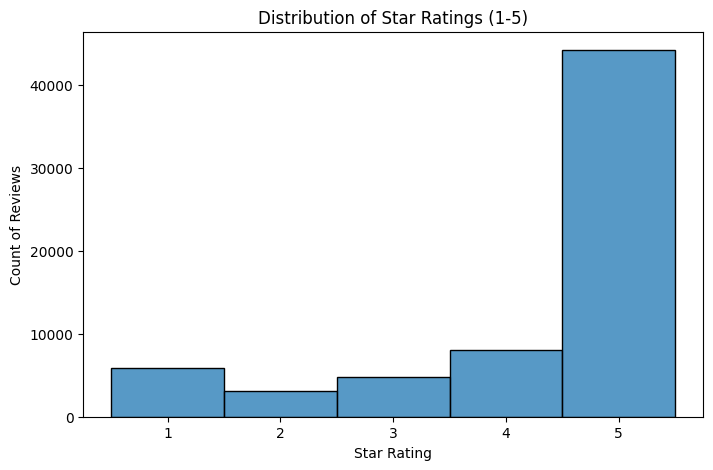

In [ ]:
plt.figure(figsize=(8, 5))
sns.histplot(data=df, x='rating', bins=5, discrete=True)
plt.title('Distribution of Star Ratings (1-5)')
plt.xlabel('Star Rating')
plt.ylabel('Count of Reviews')
plt.xticks(range(1, 6))
plt.show()

## Top 10 Categories by Review Count

<ipython-input-13-dd493baa48ad>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_categories.values, y=top_categories.index, palette='viridis')


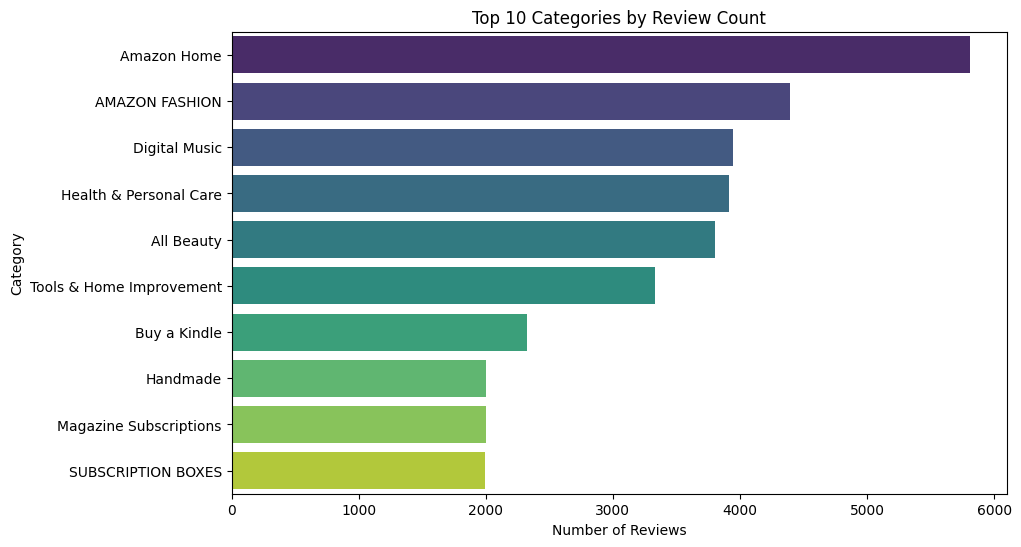

In [ ]:
plt.figure(figsize=(10, 6))
top_categories = df['main_category'].value_counts().head(10)
sns.barplot(x=top_categories.values, y=top_categories.index, palette='viridis')
plt.title('Top 10 Categories by Review Count')
plt.xlabel('Number of Reviews')
plt.ylabel('Category')
plt.show()

## Top 10 Brands by Review Count (excluding Unknown)

<ipython-input-18-40e8a0fe15f5>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_brands.values, y=top_brands.index, palette='magma')


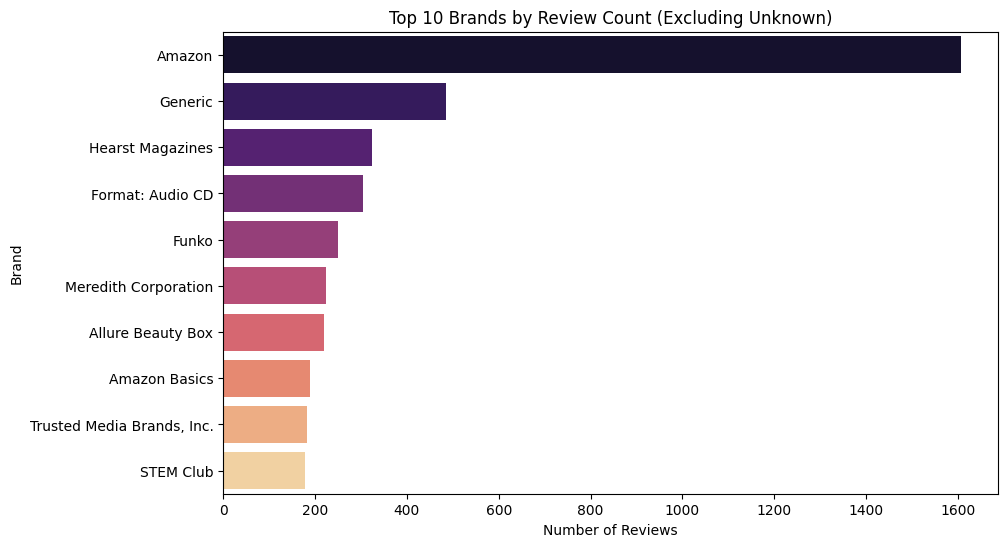

In [ ]:
plt.figure(figsize=(10, 6))
# Assuming brand is in the 'details' dictionary column
top_brands = df[df['brand'] != 'Unknown']['brand'].value_counts().head(10)
sns.barplot(x=top_brands.values, y=top_brands.index, palette='magma')
plt.title('Top 10 Brands by Review Count (Excluding Unknown)')
plt.xlabel('Number of Reviews')
plt.ylabel('Brand')
plt.show()

##  Time-Based Trend of Average Star Rating

In [53]:
df['year'] = pd.to_datetime(df['timestamp'], unit='ms', errors='coerce').dt.year


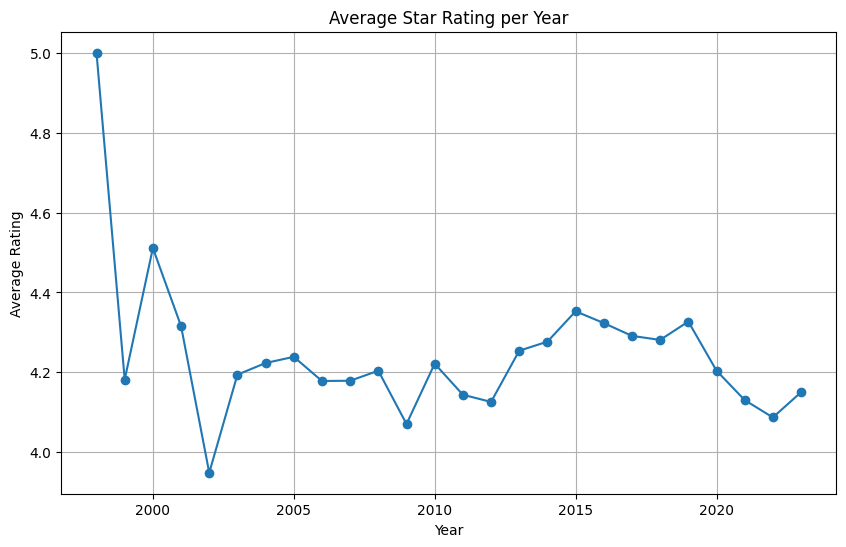

In [54]:
plt.figure(figsize=(10, 6))
# Convert timestamp to datetime and extract year
yearly_avg = df.groupby('year')['rating'].mean()
yearly_avg.plot(kind='line', marker='o')
plt.title('Average Star Rating per Year')
plt.xlabel('Year')
plt.ylabel('Average Rating')
plt.grid(True)
plt.show()

## Correlation between review_length and star-rating

In [55]:
from scipy.stats import pearsonr

In [56]:
df['review_length'] = df['text'].apply(len)
corr, p_value = pearsonr(df['review_length'], df['rating'])
print(f"Pearson correlation between review length and star rating: {corr:.3f}")
print("Interpretation: The correlation coefficient indicates the strength and direction of the linear relationship.")
print(f"In this case, the value of {corr:.3f} suggests {'a weak' if abs(corr) < 0.3 else 'a moderate'} {'positive' if corr > 0 else 'negative'} relationship.")


Pearson correlation between review length and star rating: -0.076
Interpretation: The correlation coefficient indicates the strength and direction of the linear relationship.
In this case, the value of -0.076 suggests a weak negative relationship.


## Additional Analyses
# Distribution of helpful_vote counts

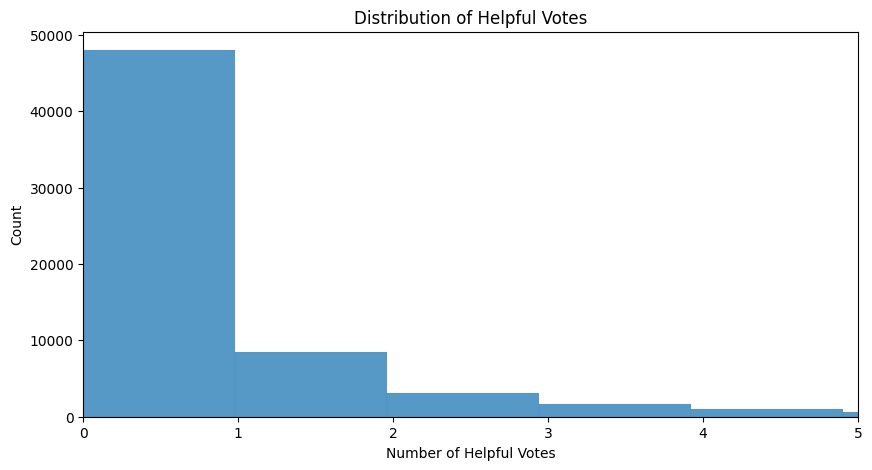

In [57]:
if 'helpful_vote' in df.columns:
    plt.figure(figsize=(10, 5))
    sns.histplot(data=df, x='helpful_vote', bins=2000)
    plt.title('Distribution of Helpful Votes')
    plt.xlabel('Number of Helpful Votes')
    plt.ylabel('Count')
    plt.xlim(0, df['helpful_vote'].quantile(0.95))  # Show up to 95th percentile to avoid long tail
    plt.show()

# Relationship between verified_purchase and star ratin

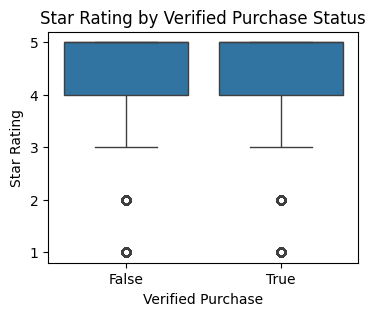

In [58]:
if 'verified_purchase' in df.columns:
    plt.figure(figsize=(4, 3))
    sns.boxplot(data=df, x='verified_purchase', y='rating')
    plt.title('Star Rating by Verified Purchase Status')
    plt.xlabel('Verified Purchase')
    plt.ylabel('Star Rating')
    plt.show()

In [59]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt

##  Transform rating into binary sentiment

In [60]:
df['sentiment'] = np.where(df['rating'] > 3, 'Positive', 'Negative')

## Train/Test Split (80/20)

In [62]:
X_train, X_test, y_train, y_test = train_test_split(
    df['text'],
    df['sentiment'],
    test_size=0.2,
    random_state=42,
    shuffle=True
)

## Text Vectorization with TF-IDF

In [63]:
tfidf = TfidfVectorizer(
    lowercase=True,
    token_pattern=r'(?u)\b\w\w+\b',  # splits on whitespace/punctuation
    min_df=5,       # discard tokens appearing in fewer than 5 reviews
    max_df=0.8      # discard tokens appearing in more than 80% of reviews
)

X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

print(f"Number of features (vocabulary size): {len(tfidf.get_feature_names_out())}")

Number of features (vocabulary size): 12895


## Logistic Regression Classifier

In [64]:
logreg = LogisticRegression(max_iter=1000)  # increased max_iter for convergence
logreg.fit(X_train_tfidf, y_train)

LogisticRegression(max_iter=1000)

## Evaluation

**Predictions**

In [65]:
y_pred = logreg.predict(X_test_tfidf)

**Accuracy**

In [66]:
accuracy = accuracy_score(y_test, y_pred)
print(f"\nAccuracy: {accuracy:.4f}")


Accuracy: 0.8890


**F1 Score**

In [67]:
f1 = f1_score(y_test, y_pred, pos_label='Positive')
print(f"F1 Score (Positive class): {f1:.4f}")

F1 Score (Positive class): 0.9325


**Confusion Matrix**

In [68]:
cm = confusion_matrix(y_test, y_pred, labels=['Negative', 'Positive'])
print("\nConfusion Matrix:")
print(cm)


Confusion Matrix:
[[ 1610  1061]
 [  404 10125]]


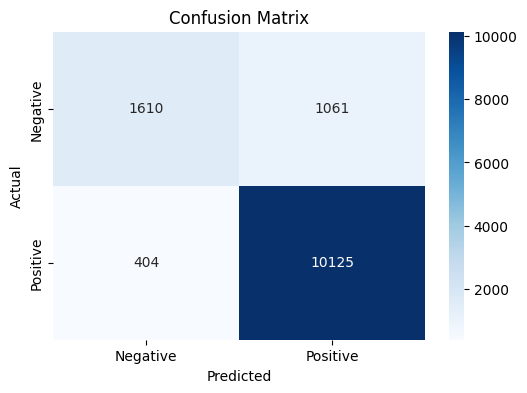

In [69]:
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Negative', 'Positive'],
            yticklabels=['Negative', 'Positive'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()